<a href="https://colab.research.google.com/github/sunc-dev/Tensorflow-ml-learning/blob/master/Learning_series_Fashion_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
##Libraries and Dependancies
import numpy as np
import random
import matplotlib.pyplot as plt

## TensorFlow and Keras
import tensorflow as tf
from tensorflow import keras
from skimage.color import rgb2gray

print(tf.__version__)


1.15.0


In [0]:
##Define Functions

## Image plot function
def plot_images(image_set,image_sl):

  for idx, id in enumerate(image_sl):
    plt.subplot(1, 4, idx+1)
    plt.axis('off')
    plt.imshow(image_set[image_sl[idx]], cmap='gray')
    plt.grid(False)
    plt.colorbar()
    plt.subplots_adjust(wspace=0.5)
    
    
  plots = plt.show()
  outputs = print("shape: {0}, min: {1}, max: {2}".format(image_set[image_sl[idx]].shape, 
                                                  image_set[image_sl[idx]].min(), 
                                                  image_set[image_sl[idx]].max()))

In [0]:
## Import Fashion MNIST data

fashionData = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashionData.load_data()



In [0]:
## Define class names

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [23]:
## Explore shape
train_images.shape
#Output defines # images and size of each label 60, 000 images each image size is 28x28

(60000, 28, 28)

In [24]:
## Explore # of labels
len(train_labels)

## Explore label object
train_labels

##Explore # of test labels
len(test_labels)


10000

[33196, 33676, 14288, 56757]


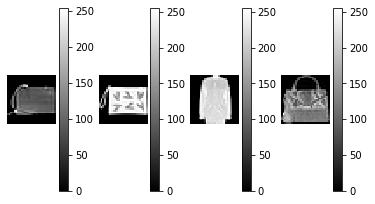

shape: (28, 28), min: 0, max: 255


In [58]:
##Data preprocessing


#Select random set of images 
image_sl = random.sample(range(1, len(train_images)), 4)
print(image_sl)

plot_images(train_images, image_sl)

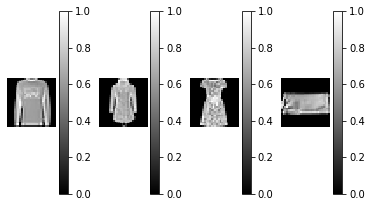

shape: (28, 28), min: 0.0, max: 1.0


In [57]:
#Convert images to gray scale

train_images_g = train_images/255.0
test_images_g = test_images/255.0

plot_images(train_images_g, image_sl)

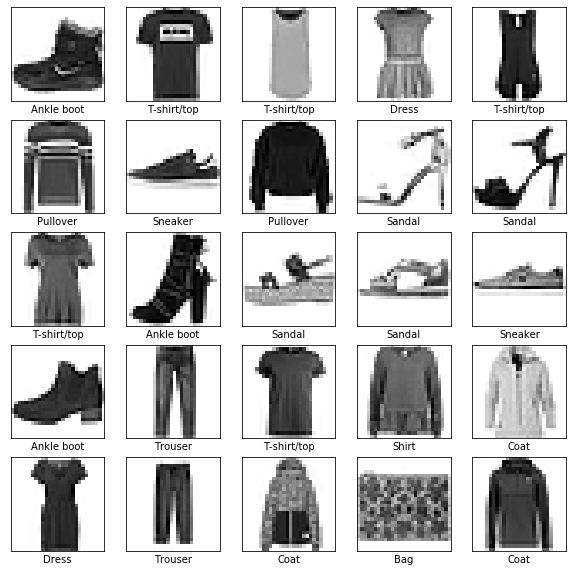

In [61]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images_g[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [0]:
## Building Model

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)      
])


In [92]:
## Compile Model

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(train_images_g, train_labels, epochs=10)



Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 75us/sample - loss: 0.5004 - acc: 0.8256
Epoch 2/10
60000/60000 [==============================] - 5s 84us/sample - loss: 0.3787 - acc: 0.8630
Epoch 3/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.3407 - acc: 0.8762
Epoch 4/10
60000/60000 [==============================] - 4s 67us/sample - loss: 0.3141 - acc: 0.8849
Epoch 5/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.2987 - acc: 0.8901
Epoch 6/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.2816 - acc: 0.8955
Epoch 7/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.2692 - acc: 0.8996
Epoch 8/10
60000/60000 [==============================] - 4s 71us/sample - loss: 0.2581 - acc: 0.9036
Epoch 9/10
60000/60000 [==============================] - 4s 69us/sample - loss: 0.2497 - acc: 0.9064
Epoch 10/10
60000/60000 [==============================] - 

In [93]:
test_loss, test_acc = model.evaluate(test_images_g, test_labels, verbose=2)

10000/10000 - 0s - loss: 0.3351 - acc: 0.8872


In [94]:
##Run prediction 
predictions=model.predict(test_images_g)
predictions[0]
np.argmax(predictions[0])

9

In [0]:
## Visualize results and evaluate model

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


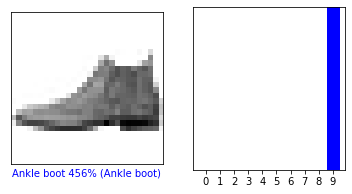

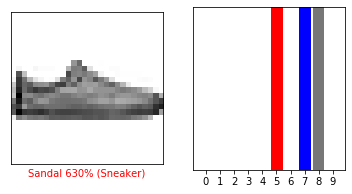

In [99]:
# Run test on first image

i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

# Run test on second image


i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()



num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()